# Tic-Tac-Toe Statistics Plotting

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
from matplotlib.pyplot import cm

## Showing each player's winning rate

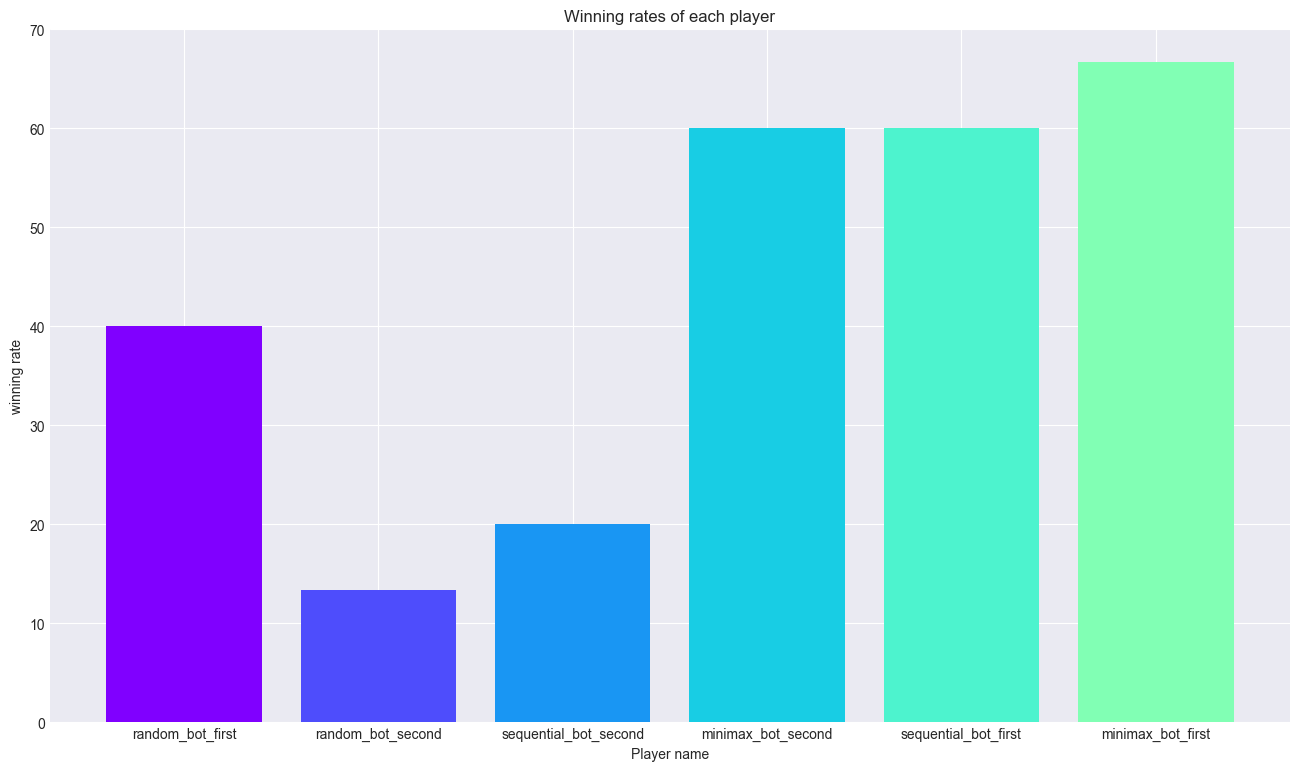

In [23]:
df = pd.read_csv('statistics.csv', index_col=0)
df['winning_rate'] = df['wins'] / df['played'] * 100
fig, ax = plt.subplots(figsize=(16, 9))
color = cm.rainbow(np.linspace(0, 0.5, len(df)))
ax.bar(df.index.tolist(), df['winning_rate'].tolist(), color=color)

ax.set_ylabel('winning rate')
ax.set_xlabel('Player name')
ax.set_title('Winning rates of each player')

plt.show()

## Showing the change of winning rates of random player who starts first

Text(0.5, 1.0, "Winning rates' change during the play of random_bot_first")

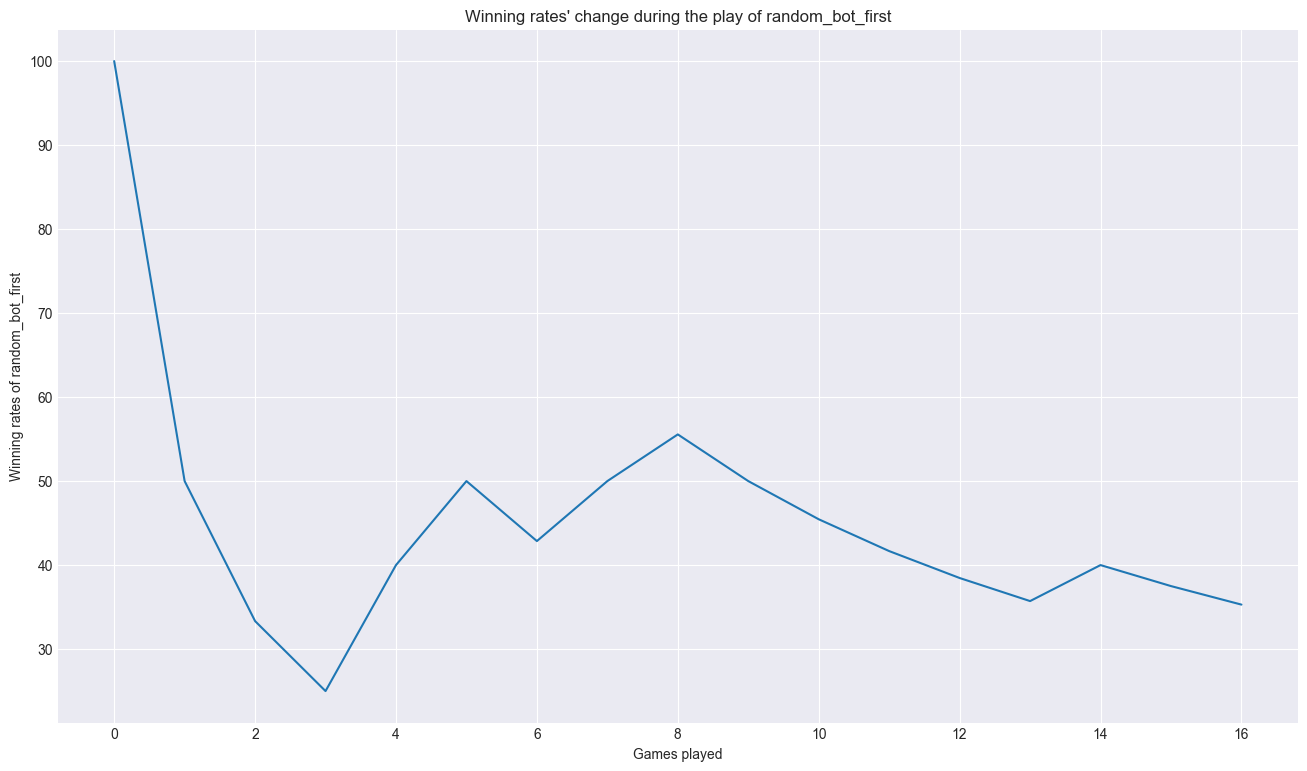

In [19]:
df = pd.read_csv('savegame.csv')
df = df[df['players'].apply(lambda x: 'random_bot_first' in x)]
winning_rates = []
games_played = 0
games_won = 0
for i, r in df.iterrows():
    games_played += 1
    if r['winner'] == 'random_bot_first':
        games_won += 1
    winning_rates.append(games_won / games_played * 100)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(winning_rates)
ax.set_xlabel("Games played")
ax.set_ylabel("Winning rates of random_bot_first")
ax.set_title("Winning rates' change during the play of random_bot_first")

## Showing the correlation between the winning rate and the time taken for each move

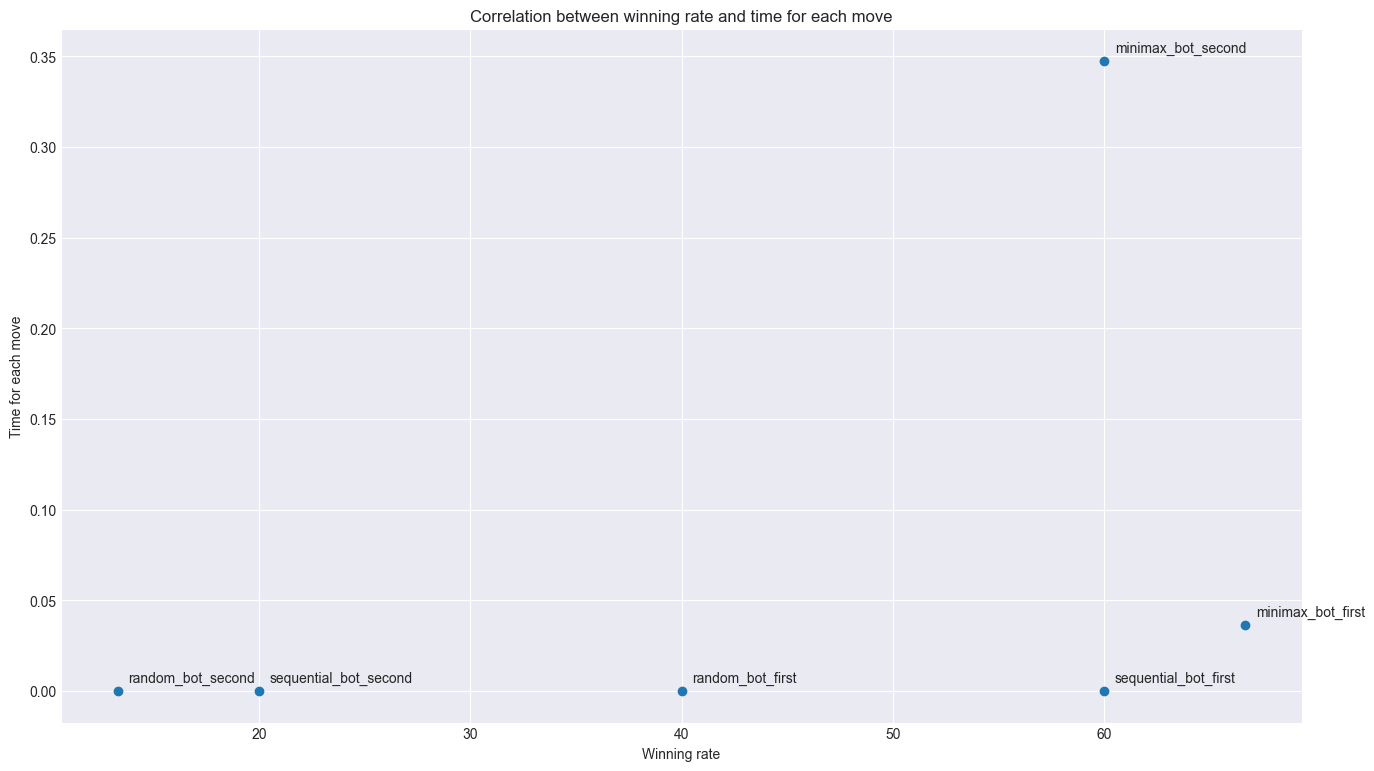

In [30]:
df = pd.read_csv('statistics.csv', index_col=0)
df['winning_rate'] = df['wins'] / df['played'] * 100
df['each_move_time'] = df['thinking_time'] / df['moves_take']
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x=df['winning_rate'], y=df['each_move_time'])
for i, txt in enumerate(df.index.tolist()):
    ax.annotate(txt, (df['winning_rate'].iloc[i] + .5, df['each_move_time'].iloc[i] + 0.005))
ax.set_xlabel("Winning rate")
ax.set_ylabel("Time for each move")
ax.set_title("Correlation between winning rate and time for each move")
plt.show()